# Exploratory Data Analysis (EDA) Summary

## Seasonal Trends
1. Demand for Rental Bikes (y):
- Highest demand is observed from May to October (spring to early fall).
- Possible reasons: Warmer weather, longer daylight hours, and increased outdoor activities.
- Recommendation: Further analyze by day of the week to see if weekends have higher demand.
## Quarterly Demand
- Q3 (July - September) sees the highest demand for rental bikes.
- This aligns with peak summer, vacations, and increased outdoor movement.
- Business Insight: Promotions and marketing should be focused on Q2-Q3.
## AutoCorrelation Analysis (ACF)
- Significant autocorrelation up to lag 50 → Strong influence of past values.
- This means bike rentals are influenced by past trends over roughly 50 time units (days or hours, depending on granularity).
- Implication: Forecasting models should include long-term dependencies.
## Partial AutoCorrelation (PACF)
- Significant correlation up to lag 6 → Short-term dependency (6 days).
- This suggests a weekly pattern where rental trends reset every ~6 days.
- Implication: A 7-day lag feature should be included in the forecasting model.
## Holidays
- Added Holidays as the holidays might affet the bike rentals as people might use more rental bikes at holidays

In [1]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import month_plot,quarter_plot,plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/preprocessed-data.csv")
df_temp = df.copy()
df_temp.head()

,Unnamed: 0,ds,holiday,workingday,weathersit,temp,atemp,hum,windspeed,y,weathersit_2,weathersit_3
0,0,2011-01-01,0,0,2,0.344167,0.363625,0.805833,0.160446,985,True,False
1,1,2011-01-02,0,0,2,0.363478,0.353739,0.696087,0.248539,801,True,False
2,2,2011-01-03,0,1,1,0.196364,0.189405,0.437273,0.248309,1349,False,False
3,3,2011-01-04,0,1,1,0.200000,0.212122,0.590435,0.160296,1562,False,False
4,4,2011-01-05,0,1,1,0.226957,0.229270,0.436957,0.186900,1600,False,False


In [3]:
df_temp.set_index('ds',inplace=True)
df_temp.index = pd.to_datetime(df_temp.index)

In [4]:
df_temp.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-11-22', '2012-11-23', '2012-11-24', '2012-11-25',
               '2012-11-26', '2012-11-27', '2012-11-28', '2012-11-29',
               '2012-11-30', '2012-12-01'],
              dtype='datetime64[ns]', name='ds', length=701, freq=None)

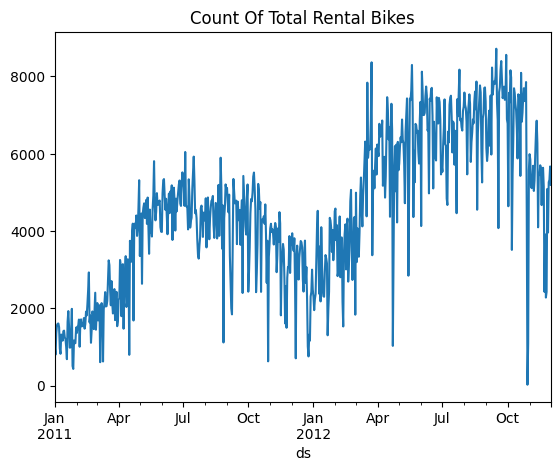

In [5]:
df_temp['y'].plot(title='Count Of Total Rental Bikes')
plt.savefig('../visualizations/EDA-Visualizations/y.png')
plt.show()

## Month PLot

C:\Users\ANAND REDDY\AppData\Local\Temp\ipykernel_25376\459826428.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_plot(df_temp['y'].resample('M').mean())


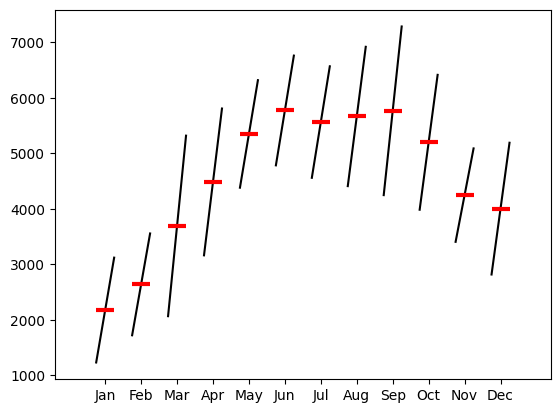

In [6]:
month_plot(df_temp['y'].resample('M').mean())
plt.savefig("../visualizations/EDA-Visualizations/month_plot.png")
plt.show()

## Quater Plot

C:\Users\ANAND REDDY\AppData\Local\Temp\ipykernel_25376\4246000631.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_plot(df_temp['y'].resample('Q').mean())


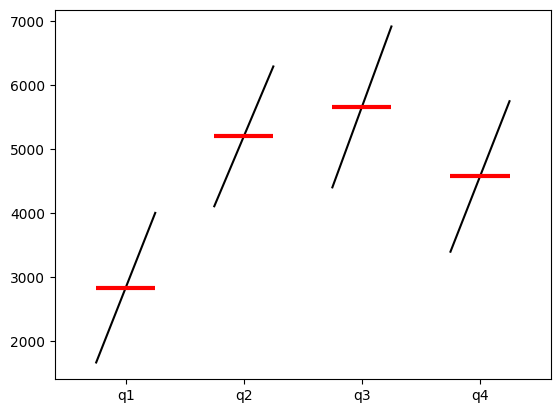

In [7]:
quarter_plot(df_temp['y'].resample('Q').mean())
plt.savefig("../visualizations/EDA-Visualizations/quarter_plot.png")
plt.show()

## AutoCorrelation

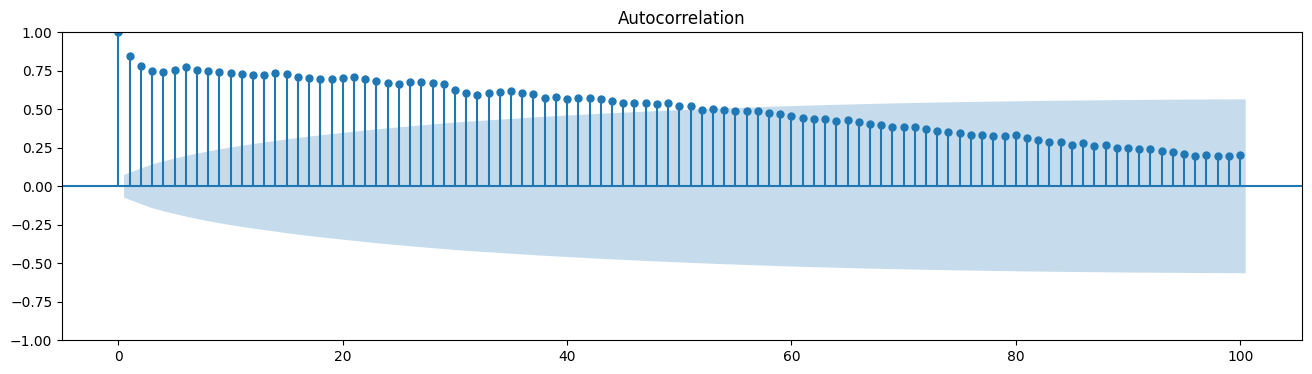

In [8]:
figs,ax = plt.subplots(figsize=(16,4))
plot_acf(df_temp.y,lags=100,ax=ax)
plt.savefig("../visualizations/EDA-Visualizations/AutoCorrelation.png")
plt.show()

## Partial Correllation

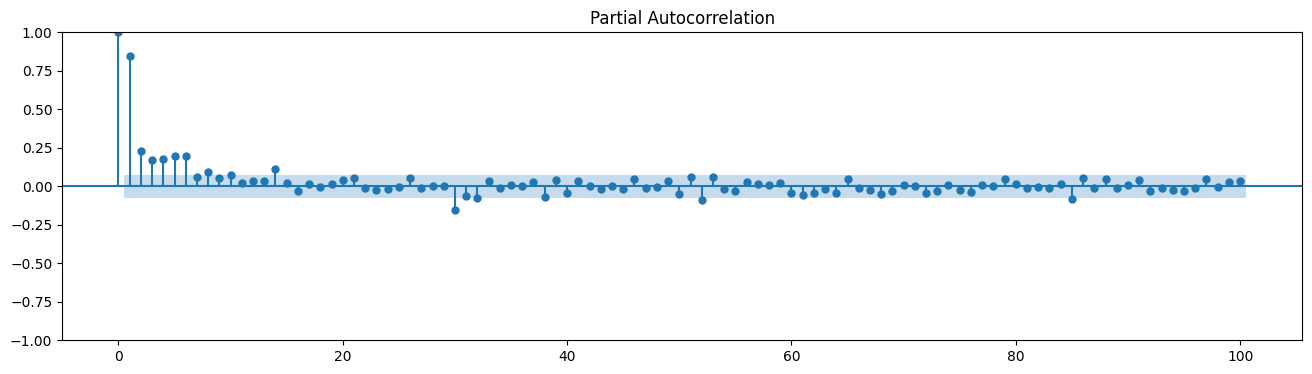

In [9]:
figs,ax = plt.subplots(figsize=(16,4))
plot_pacf(df_temp.y,lags=100,ax=ax)
plt.savefig("../visualizations/EDA-Visualizations/Partial-AutoCorrelation.png")
plt.show()

# Holidays
- data-info-> holiday : weather day is holiday or not
- 1 = Holiday
- 0 = Not a Holiday

In [10]:
df[df.holiday == 1].ds

16     2011-01-17
51     2011-02-21
104    2011-04-15
149    2011-05-30
184    2011-07-04
247    2011-09-05
282    2011-10-10
314    2011-11-11
327    2011-11-24
359    2011-12-26
366    2012-01-02
380    2012-01-16
415    2012-02-20
471    2012-04-16
513    2012-05-28
550    2012-07-04
611    2012-09-03
646    2012-10-08
681    2012-11-12
691    2012-11-22
Name: ds, dtype: object

- `ds (date column)` → Specifies when the holiday occurs.
- `lower_window` → Number of days before the holiday when its effect starts.
- `upper_window` → Number of days after the holiday when its effect fades.

In [11]:
gen_holidays = pd.DataFrame({'holiday':'gen_holi','ds':df[df.holiday==1].ds,'lower_window': -2, 'upper_window': 2})
xmas = pd.DataFrame({'holiday':'christmas','ds':pd.to_datetime(['2011-12-24','2012-12-24']),'lower_window': -3, 'upper_window': 3})
newyear = pd.DataFrame({'holiday':'new_years','ds':pd.to_datetime(['2011-12-31','2012-12-31']),'lower_window': -3, 'upper_window': 3})


In [12]:
holidays = pd.concat([gen_holidays,xmas,newyear])
holidays

,holiday,ds,lower_window,upper_window
16,gen_holi,2011-01-17,-2,2
51,gen_holi,2011-02-21,-2,2
104,gen_holi,2011-04-15,-2,2
149,gen_holi,2011-05-30,-2,2
184,gen_holi,2011-07-04,-2,2
247,gen_holi,2011-09-05,-2,2
282,gen_holi,2011-10-10,-2,2
314,gen_holi,2011-11-11,-2,2
327,gen_holi,2011-11-24,-2,2
359,gen_holi,2011-12-26,-2,2


In [ ]:
holidays.to_csv("../data/holidays.csv")